[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


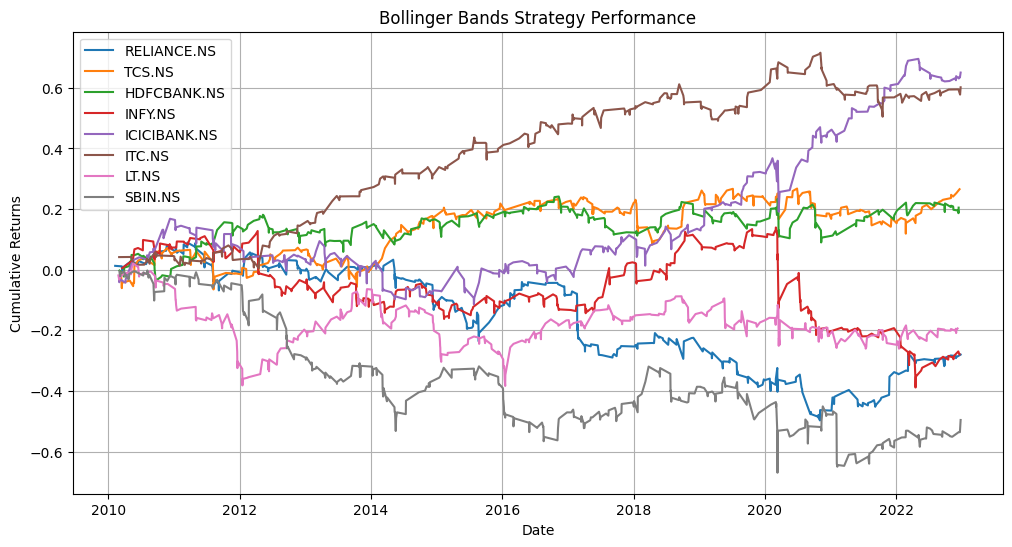

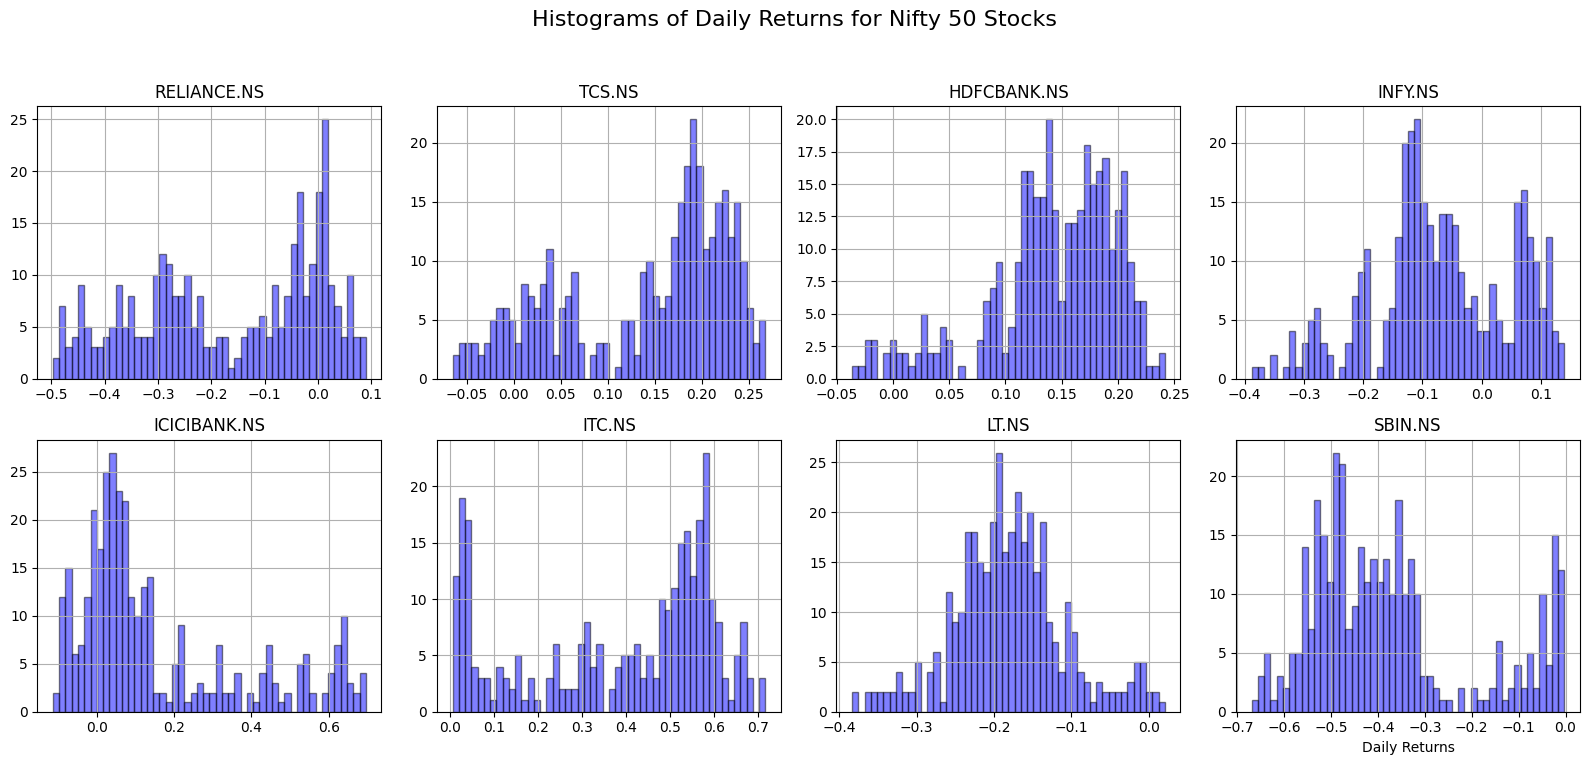

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define a function to fetch historical stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df

# Define the Bollinger Bands strategy
def bollinger_bands_strategy(df):
    # Calculate 20-day rolling mean and standard deviation
    df['SMA'] = df['Close'].rolling(window=20).mean()
    df['STD'] = df['Close'].rolling(window=20).std()

    # Calculate Bollinger Bands
    df['Upper'] = df['SMA'] + (2 * df['STD'])
    df['Lower'] = df['SMA'] - (2 * df['STD'])

    # Initialize positions
    df['Position'] = None

    # Generate trading signals
    for i in range(20, len(df)):
        if df['Close'][i] > df['Upper'][i]:
            df.at[df.index[i], 'Position'] = -1  # Short signal
        elif df['Close'][i] < df['Lower'][i]:
            df.at[df.index[i], 'Position'] = 1   # Long signal

    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change() * df['Position'].shift(1)

    return df

# List of 10 Nifty 50 stocks
stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS', 'ITC.NS', 'LT.NS', 'SBIN.NS']

# Define the date range for historical data
start_date = '2010-01-01'
end_date = '2023-01-01'

# Create a dictionary to store results for each stock
results = {}

# Fetch data, apply strategy, and store results for each stock
for stock in stocks:
    data = fetch_stock_data(stock, start_date, end_date)
    data = bollinger_bands_strategy(data)
    results[stock] = data['Daily_Return'].dropna().cumsum()

# Compare the results
plt.figure(figsize=(12, 6))
for stock, returns in results.items():
    plt.plot(returns, label=stock)

plt.title('Bollinger Bands Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left')
plt.grid(True)

# Create subplots for histograms in a 2x4 matrix
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Histograms of Daily Returns for Nifty 50 Stocks', fontsize=16)

# Plot histograms for each stock
for i, (stock, returns) in enumerate(results.items()):
    row = i // 4
    col = i % 4
    axes[row, col].hist(returns, bins=50, alpha=0.5, color='blue', edgecolor='black')
    axes[row, col].set_title(stock)
    axes[row, col].grid(True)

# Remove empty subplot(s) if the number of stocks is less than 8
if len(stocks) < 8:
    for i in range(len(stocks), 8):
        row = i // 4
        col = i % 4
        fig.delaxes(axes[row, col])

plt.xlabel('Daily Returns')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
